---
# **[ Project ] Airbnb 데이터를 활용한 데이터 분석**

----
#### 본 프로젝트는 1) 데이터 읽기 2) 데이터 전처리 3) 데이터 시각화 4) 데이터 추가 전처리 + 분석으로 총 4단계로 이루어져 있습니다.
#### ※ 분석의 목적은 다음과 같습니다. 
 1) 뉴욕시 지도위의 Airbnb를 전사해 보는 것으로 지역별 가격을 비교해봅니다. <br>
 2) 방의 타입별로 가격에 차이가 있는지 분석해봅니다. 
 


---
## 1. 데이터 살펴보기

### ① 데이터 ###
   - 이 프로젝트에서 사용하는 데이터는 Airbnb 데이터입니다.
   - https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data 에서 공개된 데이터를 사용합니다.
 
 
### ② 환경셋팅 ###
   - 이 프로젝트를 진행하기 위해서는 아래의 라이브러리가 설치되어 있어야합니다. Pandas, matplotlib, re
   - 개인의 컴퓨터에서 Jupyter Notebook 을 설치하기 힘든 상황이라면, Azure Notebook(https://notebooks.azure.com/) 을 사용하셔도 됩니다.

### ③ 필드 ###
- id, name, host_id, host_name  
- neighbourhood_group, neighbourhood, latitude, longitude  
- room_type, price, minimum_nights
- number_of_reviews, last_review, reviews_per_month  
- calculated_host_listings_count, availability_365  

---
## 2. 데이터 읽기

### **해당 챕터의 목표**
- csv로 저장되어 있는 데이터를 불러 올 수 있습니다.
- 불러온 데이터의 필드와 데이터수를 확인하는 것으로 추후 분석의 기초를 마련합니다.
- Null 데이터의 개수를 확인하는 것으로 전처리를 하기 위한 배경 지식을 얻습니다.

_제공되는 코드_

In [1]:
import pandas as pd 

### _데이터 읽기 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요) 
- read_csv, columns, shape, isnull, sum

### [Quiz 1] pandas의 함수를 사용하여 AB_NYC_2019.csv을 읽어와 data라는 이름의 변수로 저장합니다.


In [2]:
# csv 파일 읽기/불러오기
data = pd.read_csv('./AB_NYC_2019.csv')

### [Quiz 2] data 의 필드명, 필드개수, 데이터 수를 출력합니다. print 함수로 화면에 명시적으로 출력합니다.


In [3]:
# data의 필드명
print("data의 필드명: ", data.columns)

# data의 필드개수
print("data의 필드개수: ", len(data.columns),"개")

# data의 데이터 수
print("data의 데이터 수: ", len(data),"개")

data의 필드명:  Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
data의 필드개수:  16 개
data의 데이터 수:  48895 개


In [4]:
# data 출력
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
# data 필드 속성과 개수 등 정보 보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### [Quiz 3] data 의 필드명 null 데이터의 숫자를 출력합니다.

In [6]:
# 각 필드에 null의 개수 확인
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

----
## 3. 데이터 전처리

### **해당 챕터의 목표**
- 가지고 온 데이터의 일부 값이 완전하지 않은 경우가 있습니다.<br> 완전하지 않은 데이터를 사용하면 분석 결과에 오차가 생기거나 분석을 하지 못하는 경우가 발생합니다. <br> 완전하지 않은 값을 수정하거나 해당 데이터를 삭제하는 것으로 추후 분석이 가능한 데이터를 구축합니다.

### _데이터전처리 문제_
#### 문제에서 사용할 함수 (다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- notnull

### [Quiz 4] name과 host_name에서 null인 데이터를 제거합니다.

In [7]:
# 각 필드에 null의 개수 확인
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# name, host_name 필드의 null 값 제거하기
data = data[pd.notnull(data['name'])]
data = data[pd.notnull(data['host_name'])]

In [9]:
# 각 필드에 null의 개수 확인
data.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

---
## 4. 데이터 시각화

### **해당 챕터의 목표**
- 전처리가 완료된 데이터를 사용하여 데이터를 시각화합니다.
- Price의 백분위를 구해 이상치를 제거합니다.
- 제공 된 지도 위에 데이터를 매핑하는 것으로 뉴욕시의 지역별 Airbnb 가격 분포를 확인해봅니다.

제공되는 코드

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 원본 데이터의 손실을 방지하기 위해 복사본 만들기
visual_data = data.copy()

### _데이터 시각화 문제_
- 전처리가 완료된 데이터를 사용해주세요.
- Quiz6과 Quiz7에서는 아래의 파라미터를 사용해주세요.  
    - cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8)

문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- describe, plot, show

### [Quiz 5] price의 백분위 5%, 25%, 50%, 75%, 95% 를 구합니다.

In [11]:
# price의 백분위 5%
print("5%: ", visual_data.quantile(0.05)['price'])

# price의 백분위 25%
print("25%: ", visual_data.quantile(0.25)['price'])

# price의 백분위 50%
print("50%: ", visual_data.quantile(0.5)['price'])

# price의 백분위 75%
print("75%: ", visual_data.quantile(0.75)['price'])

# price의 백분위 95%
print("95%: ", visual_data.quantile(0.95)['price'])

5%:  40.0
25%:  69.0
50%:  106.0
75%:  175.0
95%:  355.0


### [Quiz 6] price의 백분위 95% 값보다 큰 데이터를 필터링(->제거한) 후, x축을 longitude y축을 latitude, c값(그래프에서의 색상)을 price로 하는 scatter 그래프를 그립니다.

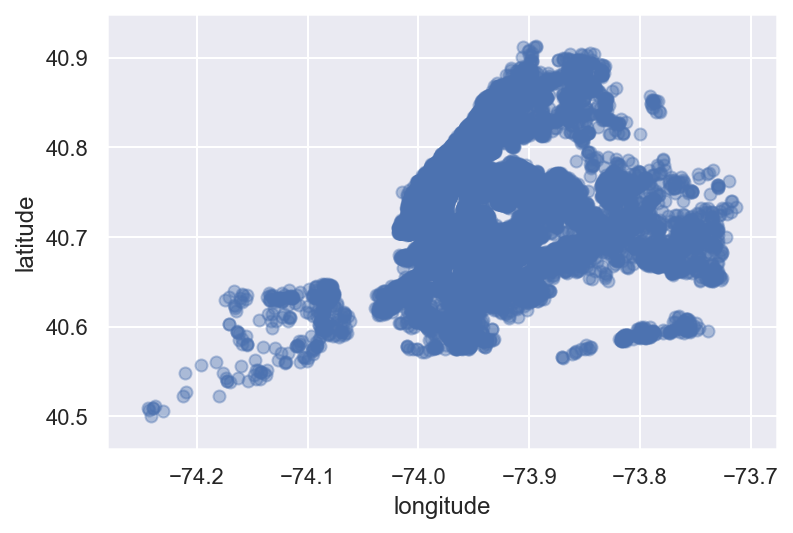

In [12]:
# price의 백분위 95% 값보다 큰 데이터 제거 즉, 95% 값보다 작은 데이터만 남긴다.
data_price_95 = visual_data[visual_data['price'] <= visual_data.quantile(0.95)['price']]

# X: longitude, Y: latitude, 색상은 jet colormaps의 색상표 사용
plt.scatter(data_price_95['longitude'], data_price_95['latitude'], cmap=plt.get_cmap('jet'), alpha=0.4)

# X축 이름: longitude
plt.xlabel('longitude')
# Y축 이름: latitude
plt.ylabel('latitude')

# 그래프 그리기
plt.show()

### [Quiz 7] 첨부된 New_York_City_.png 위에다가 퀴즈 6의 Scatter 그래프를 그립니다.

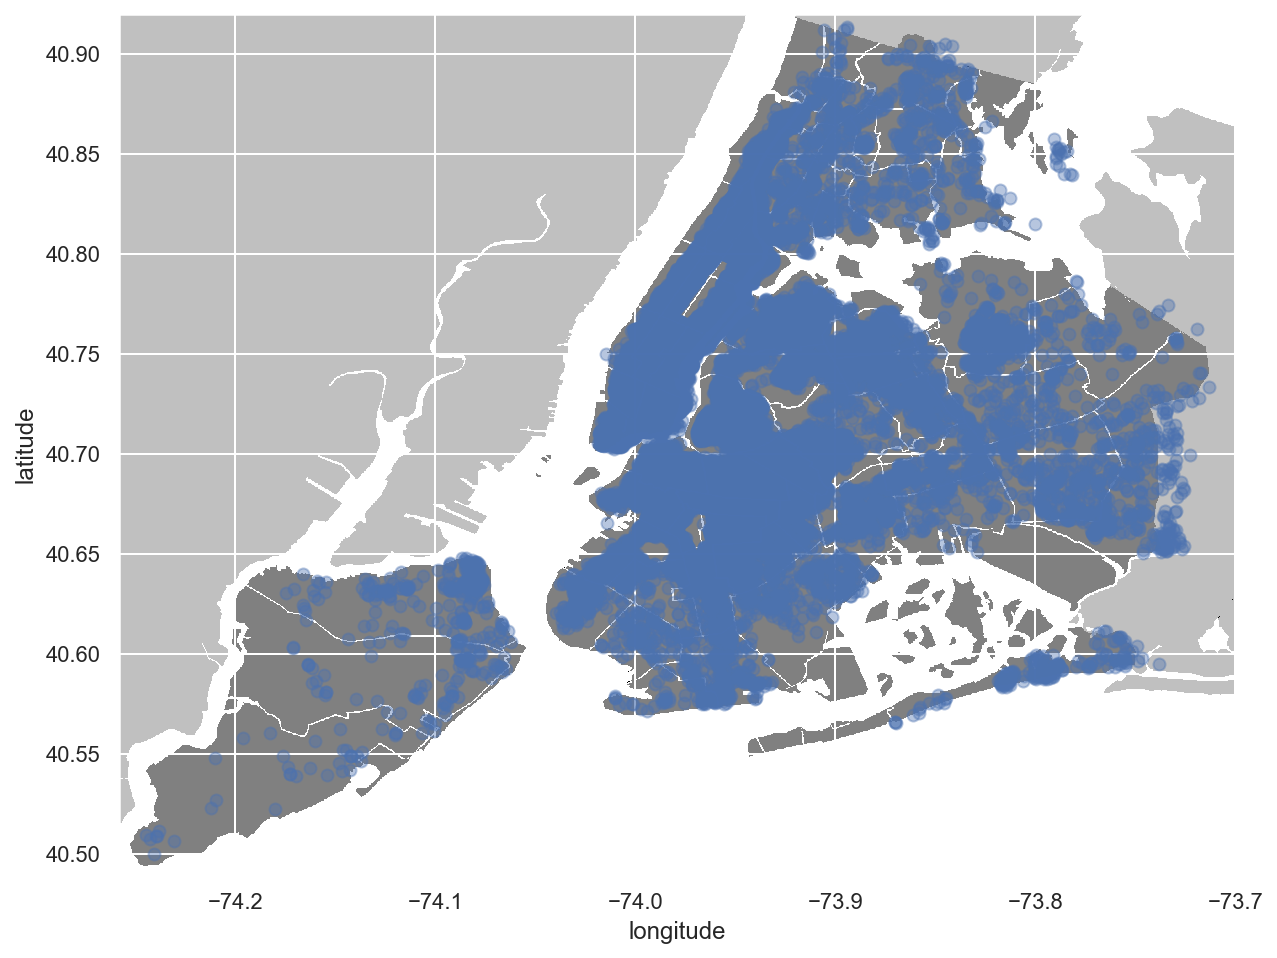

In [13]:
# (그래프에 표현할) 이미지 불러오기
newyorkcity = plt.imread('newyorkcity.png')

# 그래프 사이즈
plt.figure(figsize=(10,8))

# 그래프와 이미지 세팅
plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])

# 이미지가 포함될 때, 사용한다.
ax = plt.gca()

# price의 백분위 95% 값보다 큰 데이터 제거 즉, 95% 값보다 작은 데이터만 남긴다.
data_price_95 = visual_data[visual_data['price'] < visual_data.quantile(0.95)['price']]
# X: longitude, Y: latitude, 색상은 jet colormaps의 색상표 사용
plt.scatter(data_price_95['longitude'], data_price_95['latitude'], cmap=plt.get_cmap('jet'), alpha=0.4)

# X축 이름: longitude
plt.xlabel('longitude')
# Y축 이름: latitude
plt.ylabel('latitude')

# 그래프 그리기
plt.show()

---
## 5. 데이터 추가 전처리 + 분석

### **해당 챕터의 목표**
- 분석 목표에 따라 추가 전처리가 필요한 경우가 있습니다. 이번 프로젝트에서는 분석 전 추가 전처리를 진행합니다.
- 이상한 문자열이 들어간 데이터를 제거하는 것으로 조금 더 formal한 데이터만을 타게팅합니다.
- room_type 이 가격에 영향을 끼치는지를 히스토그램으로 분석해봅니다.
- sql 문을 사용하여 원하는 데이터를 추출해봅니다.

제공되는 코드

In [14]:
# 정규식 표현을 위해 re를 import
import re

# 원본 데이터의 손실을 방지하기 위해 복사본 만들기
analysis_data = data.copy()

In [15]:
# DataFrame 출력
analysis_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [16]:
# 해당 DataFrame의 속성 확인
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  last_review                     

### _데이터 추가 전처리 + 분석 문제_
문제에서 사용할 함수(다른 함수를 사용하는것으로 같은 결과를 출력할 수 있지만 가능한 아래의 함수를 사용해주세요)  
- compile, unique, groupby, get_group, reset_index, head, hist, read_sql

### [Quiz 8]  re 함수 사용 : name 필드에 영문, 숫자, '.', ',', '-', '#', 공백 외의 문자가 들어가 있는 데이터를 필터(->제거)합니다.

In [17]:
# name 필드에 특수문자 확인을 위해 정규식 패턴 만듬
name_re = re.compile(r'[^A-z0-9-# .,\s]+')     # 공백을 잡기 위해서 \s 사용

# name 필드에서 위 정규식에 해당되는 글자 외의 문자가 들어가 있는 데이터를 제거
analysis_data.drop(analysis_data.loc[analysis_data['name'].str.contains(name_re)==True].index, inplace=True)

# 정상적으로 제거가 되었는지 확인
analysis_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48887,36483152,Garden Jewel Apartment in Williamsburg New York,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,170,1,0,NaN,NaN,3,365
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


In [18]:
# 제거가 얼마나 됐는지 확인
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31788 entries, 1 to 48893
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              31788 non-null  int64  
 1   name                            31788 non-null  object 
 2   host_id                         31788 non-null  int64  
 3   host_name                       31788 non-null  object 
 4   neighbourhood_group             31788 non-null  object 
 5   neighbourhood                   31788 non-null  object 
 6   latitude                        31788 non-null  float64
 7   longitude                       31788 non-null  float64
 8   room_type                       31788 non-null  object 
 9   price                           31788 non-null  int64  
 10  minimum_nights                  31788 non-null  int64  
 11  number_of_reviews               31788 non-null  int64  
 12  last_review                     

### [Quiz 9] room_type의 모든 값을 구합니다. room_type으로 데이터를 GroupBy합니다. 각 Group 별로 price가 가장 높은 데이터의 (name, hostId, price)를 출력합니다. 동일한 값을 가지는 데이터가 있다면 전부 출력합니다.

In [19]:
# 원본 데이터의 손실을 방지하기 위해 복사본 만들기
analysis_df = analysis_data.copy()

# room_type unique
analysis_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [20]:
# 각 그룹별 price가 가장 높은 그룹의 name, host_id, price 출력/확인
get_max = lambda r: r[r.price==r.price.max()]
analysis_df.groupby('room_type').apply(get_max)[['name', 'host_id', 'price']]

name  \
room_type                                                                
Entire home/apt 17692  Luxury 1 bedroom apt. -stunning Manhattan views   
                29238                              1-BR Lincoln Center   
Private room    9151               Furnished room in Astoria apartment   
Shared room     14380           Mins away to Manhattan Suite Residence   

                        host_id  price  
room_type                               
Entire home/apt 17692   5143901  10000  
                29238  72390391  10000  
Private room    9151   20582832  10000  
Shared room     14380  24146326   1800

### [Quiz 10] room_type이 가격에 영향을 주는지를 확인하기 위해 하나의 그래프 위에 그룹별로 0~500까지의 price위에서 10단위로 히스토그램을 그립니다.

In [21]:
# 각 그룹을 get_group을 사용해서 나눈다.
entire_ha = analysis_df.groupby('room_type').get_group('Entire home/apt')
private_r = analysis_df.groupby('room_type').get_group('Private room')
shared_r = analysis_df.groupby('room_type').get_group('Shared room')

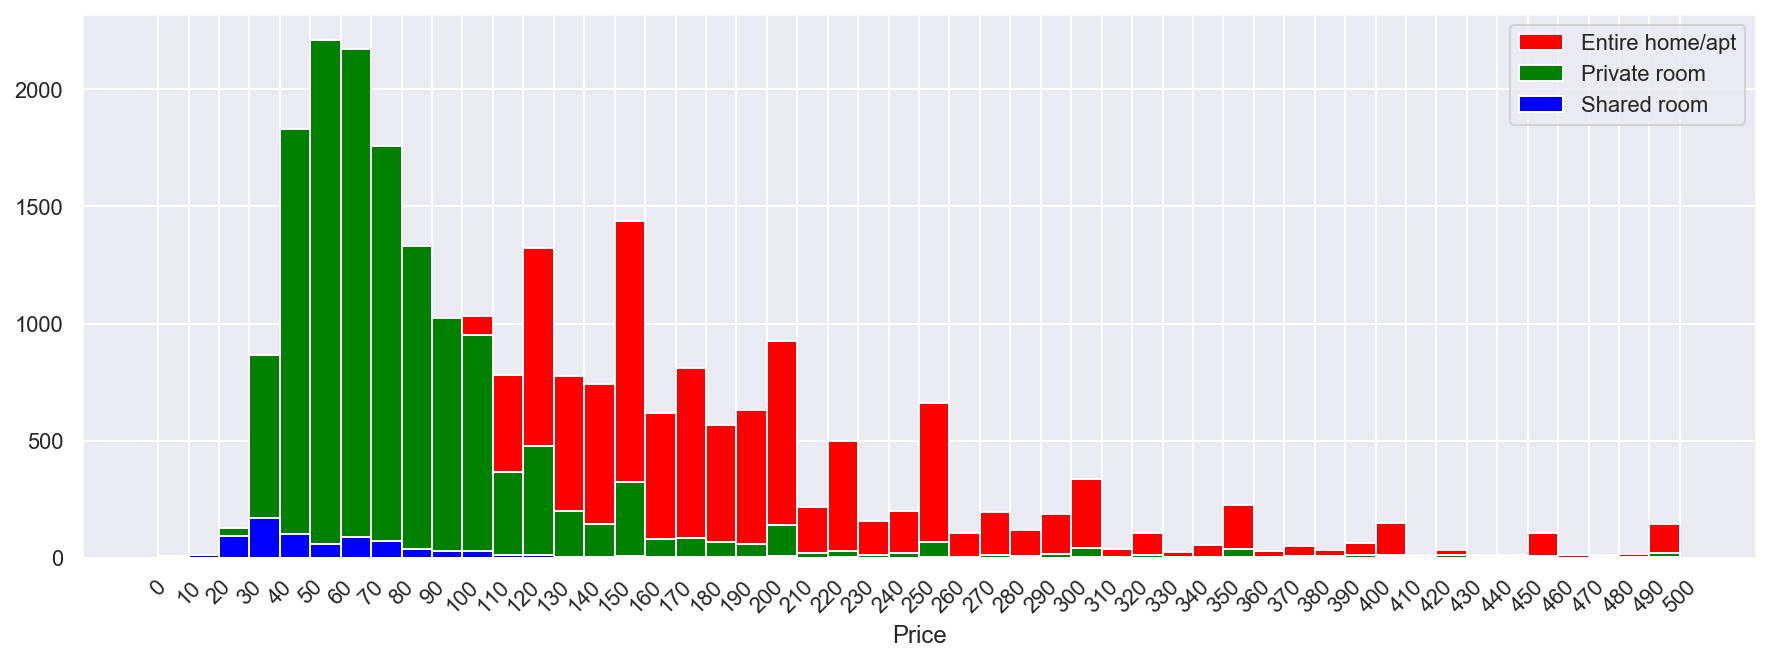

In [22]:
# 그래프 그리기
fig = plt.figure(figsize=(15,5))
# 여러 개의 그래프를 한 번에 보여주기 위함
ax = fig.add_subplot(1,1,1)

# 각 그룹을 그래프로 표한한다.
ax.hist(entire_ha.price, bins = range(0,501,10), label='Entire home/apt', color="red")
ax.hist(private_r.price, bins = range(0,501,10), label='Private room', color="green")
ax.hist(shared_r.price, bins = range(0,501,10), label='Shared room', color="blue")
# 단, bins 값 없이 그리면 이상하게 나타나므로, 500까지만 빈도를 줌으로서 아래와 같이 잘 나타남.

# 범례 위치 선정
plt.legend(loc='best')
# X축 제목: Price
plt.xlabel('Price')
# X축의 간격 및 글자 표현 각도
plt.xticks(range(0, 501, 10), rotation=45)

# 그래프 출력
plt.show()

### [Quiz 11] SQL 사용 : 등록한 방이 가장 많은(row가 가장 많은) 10개의 host_id를 구한 후, 각 host_id별로 price의 평균을 구합니다. count가 많은 순서대로 출력합니다.

In [23]:
import sqlite3

# 메모리에 DB서버를 연결하기
conn = sqlite3.connect(':memory:')

# Unicode 대신 8bit 문자열의 경우
conn.text_factory = analysis_data
# DataFrame에서 SQL로 전달하기
analysis_data.to_sql(name='data', con=conn)
# 가져올 결과에 대한 SQL
pd.read_sql(
    '''
    select host_id, AVG(price) as mean_price, count() as count
    from data
    group by host_id
    order by count desc
    limit 10
    '''
    , conn)

,host_id,mean_price,count
0,61391963,146.240964,83
1,22541573,214.527027,74
2,120762452,171.700000,50
3,190921808,104.452381,42
4,30283594,292.552632,38
5,16098958,192.942857,35
6,7503643,144.142857,35
7,119669058,52.558824,34
8,113805886,215.406250,32
9,224414117,214.142857,28
